# Dependency of Key-Hubs on Performance Metrics in the United States Airline Network

In [ ]:
!pip install cartopy

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import cartopy.crs as ccrs
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Route Data

Read in all domestic route data from 2023

In [ ]:
routes_detail = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/INFO 606/Project/Data/T_T100D_SEGMENT_ALL_CARRIER.csv')

routes_detail.head()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,UNIQUE_CARRIER,UNIQUE_CARRIER_NAME,CARRIER_GROUP_NEW,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,AIRCRAFT_TYPE,MONTH
0,0.0,0.0,1BQ,"Eastern Airlines f/k/a Dynamic Airways, LLC",1,10172,ADW,"Camp Springs, MD",MD,14307,PVD,"Providence, RI",RI,626,8
1,0.0,0.0,1BQ,"Eastern Airlines f/k/a Dynamic Airways, LLC",1,10185,AEX,"Alexandria, LA",LA,10397,ATL,"Atlanta, GA",GA,625,8
2,0.0,0.0,1BQ,"Eastern Airlines f/k/a Dynamic Airways, LLC",1,10466,AZA,"Phoenix, AZ",AZ,13198,MCI,"Kansas City, MO",MO,626,8
3,0.0,0.0,1BQ,"Eastern Airlines f/k/a Dynamic Airways, LLC",1,10821,BWI,"Baltimore, MD",MD,13198,MCI,"Kansas City, MO",MO,626,6
4,0.0,0.0,1BQ,"Eastern Airlines f/k/a Dynamic Airways, LLC",1,11259,DAL,"Dallas, TX",TX,13204,MCO,"Orlando, FL",FL,625,7


In [ ]:
routes_detail.shape[0]

425900

In [ ]:
routes_detail['UNIQUE_CARRIER_NAME'].unique().shape[0]

202

Remove charter (private) airlines and international carriers as well as cargo haulers. Only kept the airlines that also included delay data for further analysis

In [ ]:
import pandas as pd

# load the csv
routes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/INFO 606/Project/Data/T_T100D_SEGMENT_ALL_CARRIER.csv')

# list UNIQUE_CARRIER_NAME values to keep
carrier_names = [
    'Endeavor Air Inc.',
    'American Airlines Inc.',
    'Alaska Airlines Inc.',
    'JetBlue Airways',
    'Delta Air Lines Inc.',
    'Frontier Airlines Inc.',
    'Allegiant Air',
    'Hawaiian Airlines Inc.',
    'Envoy Air',
    'Spirit Air Lines',
    'PSA Airlines Inc.',
    'SkyWest Airlines Inc.',
    'United Air Lines Inc.',
    'Southwest Airlines Co.',
    'Republic Airline',
]

# boolean mask rows where UNIQUE_CARRIER_NAME in list of carrier names
mask = routes['UNIQUE_CARRIER_NAME'].isin(carrier_names)

# filter df & keep rows where 'UNIQUE_CARRIER_NAME' is in  list
routes_commercial = routes[mask]



In [ ]:
routes_commercial['UNIQUE_CARRIER_NAME'].unique().shape[0]

15

In [ ]:
routes_commercial.shape[0]

284321

Remove unnecessary columns

In [ ]:
routes = routes_commercial.drop(columns = ['DEPARTURES_SCHEDULED', 'DEPARTURES_PERFORMED', 'UNIQUE_CARRIER',
      'CARRIER_GROUP_NEW', 'ORIGIN_AIRPORT_ID',
      'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'DEST_AIRPORT_ID',
       'DEST_CITY_NAME', 'DEST_STATE_ABR', 'AIRCRAFT_TYPE', 'MONTH'])

print("rows before:", routes.shape[0])

# drop duplicates of the same lines by the same airlines to a destination
routes = routes.drop_duplicates()
print("rows after:", routes.shape[0])

# now, drop 'UNIQUE_CARRIER_NAME'
routes = routes.drop(columns = ['UNIQUE_CARRIER_NAME'])


# routes = routes.drop_duplicates()
# print("rows after:", routes.shape[0])

rows before: 284321
rows after: 25090


In [ ]:
routes.head()

,ORIGIN,DEST
73,AEX,ATL
75,ATL,DTW
76,ATL,FOE
77,ATL,LGA
78,ATL,MSP


Now let's plot the world's airports based on their longitude and latitute from the airports df

In [ ]:
airports = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/INFO 606/Project/Data/airports.csv',
                       names = ['id', 'name', 'city', 'country', 'iata','icao', 'lat', 'long',
                       'altitude', 'timezone','dst', 'tz'], na_values='\\N', index_col=4)

airports = airports[airports['country'] == 'United States']

airports.head()

,id,name,city,country,icao,lat,long,altitude,timezone,dst,tz
iata,,,,,,,,,,,
BTI,3411,Barter Island LRRS Airport,Barter Island,United States,PABA,70.134003,-143.582001,2,-9.0,A,America/Anchorage
NaN,3412,Wainwright Air Station,Fort Wainwright,United States,PAWT,70.613403,-159.860001,35,-9.0,A,America/Anchorage
LUR,3413,Cape Lisburne LRRS Airport,Cape Lisburne,United States,PALU,68.875099,-166.110001,16,-9.0,A,America/Anchorage
PIZ,3414,Point Lay LRRS Airport,Point Lay,United States,PPIZ,69.732903,-163.005005,22,-9.0,A,America/Anchorage
ITO,3415,Hilo International Airport,Hilo,United States,PHTO,19.721399,-155.048004,38,-10.0,N,Pacific/Honolulu


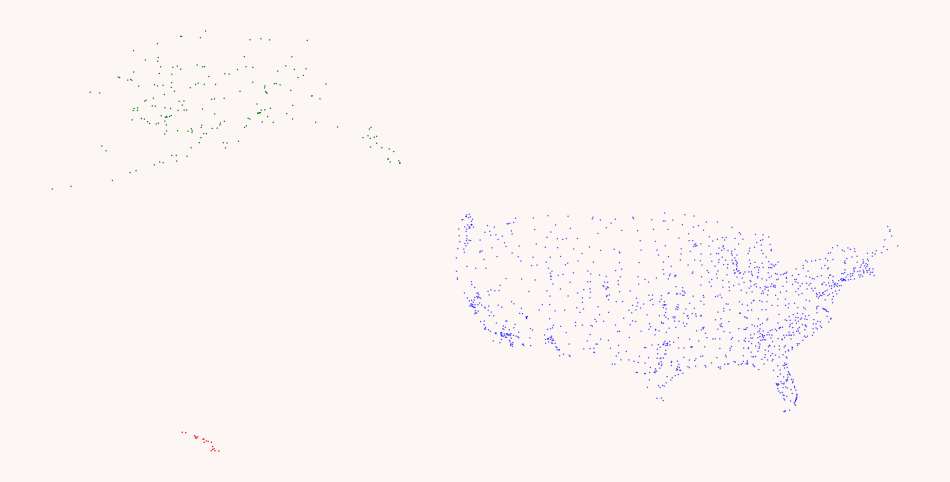

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(12, 6)

# continental US
continental_us_xlim = (-125, -65)  # long range continental US
continental_us_ylim = (24, 50)     # lat range continental US

# scatter plot continental US
continental_us = airports[
    (airports['long'] >= continental_us_xlim[0]) & (airports['long'] <= continental_us_xlim[1]) &
    (airports['lat'] >= continental_us_ylim[0]) & (airports['lat'] <= continental_us_ylim[1])
]
ax.scatter(continental_us['long'], continental_us['lat'], s=1, alpha=0.7, edgecolors='none', color='blue')

# scatter plot for Alaska
alaska_xlim = (-180, -130)  # long range alaska
alaska_ylim = (50, 72)      # lat range alaska
alaska = airports[
    (airports['long'] >= alaska_xlim[0]) & (airports['long'] <= alaska_xlim[1]) &
    (airports['lat'] >= alaska_ylim[0]) & (airports['lat'] <= alaska_ylim[1])
]
ax.scatter(alaska['long'], alaska['lat'], s=1, alpha=1, edgecolors='none', color='green')

# scatter plot for hawaii
hawaii_xlim = (-160, -154)  # long range for hawaii
hawaii_ylim = (18, 23)       # lat range for hawaii
hawaii = airports[
    (airports['long'] >= hawaii_xlim[0]) & (airports['long'] <= hawaii_xlim[1]) &
    (airports['lat'] >= hawaii_ylim[0]) & (airports['lat'] <= hawaii_ylim[1])
]
ax.scatter(hawaii['long'], hawaii['lat'], s=1, alpha=1, edgecolors='none', color='red')

ax.axis('off')
plt.show()


Combine routes with the latidude and longitude

In [ ]:
routes_edit = routes.copy()

In [ ]:

airports_reset_index = airports.reset_index()

# merge routes_edit with airports for origin airports
merged_origin = routes_edit.merge(airports_reset_index[['iata', 'lat', 'long']], left_on='ORIGIN', right_on='iata', how='left')
merged_origin.rename(columns={'lat': 'ORIGIN_LAT', 'long': 'ORIGIN_LONG'}, inplace=True)

# merge routes_edit with airports for destination airports
merged_dest = routes_edit.merge(airports_reset_index[['iata', 'lat', 'long']], left_on='DEST', right_on='iata', how='left')
merged_dest.rename(columns={'lat': 'DEST_LAT', 'long': 'DEST_LONG'}, inplace=True)

# keep desired columns
routes_merged = pd.concat([merged_origin[['ORIGIN', 'DEST', 'ORIGIN_LAT', 'ORIGIN_LONG']],
                           merged_dest[['DEST_LAT', 'DEST_LONG']]], axis=1)

# df columns: ORIGIN, DEST, ORIGIN_LAT, DEST_LAT, ORIGIN_LONG, DEST_LONG
routes_merged = routes_merged.dropna()
routes_merged


,ORIGIN,DEST,ORIGIN_LAT,ORIGIN_LONG,DEST_LAT,DEST_LONG
0,AEX,ATL,31.327400,-92.549797,33.636700,-84.428101
1,ATL,DTW,33.636700,-84.428101,42.212399,-83.353401
2,ATL,FOE,33.636700,-84.428101,38.950901,-95.663597
3,ATL,LGA,33.636700,-84.428101,40.777199,-73.872597
4,ATL,MSP,33.636700,-84.428101,44.882000,-93.221802
...,...,...,...,...,...,...
25085,PDX,SEA,45.588699,-122.598000,47.449001,-122.308998
25086,BOS,LGA,42.364300,-71.005203,40.777199,-73.872597
25087,LGA,BOS,40.777199,-73.872597,42.364300,-71.005203
25088,DCA,BOS,38.852100,-77.037697,42.364300,-71.005203


In [ ]:
# drop rows where ORIGIN is equal to DEST
routes_merged = routes_merged.drop(routes_merged[routes_merged['ORIGIN'] == routes_merged['DEST']].index)


#Finding Airport Hubs Through Centrality Measures

Quantity of flights will become the weights. The example is if more than one airline fly to the same destination

In [ ]:
routes_weighted = routes_merged.groupby(['ORIGIN', 'DEST']).size()
routes_weighted.head(25)

ORIGIN  DEST
ABE     AGS     1
        ATL     2
        AVP     1
        BNA     1
        BOS     3
        BTV     1
        CLT     3
        CSG     1
        DAY     1
        DEN     1
        DLH     1
        DTW     1
        EWR     3
        FLL     1
        FLO     1
        FSD     1
        GRB     1
        GSO     1
        GSP     1
        HPN     2
        JFK     5
        JST     1
        LGA     3
        LIT     1
        MDT     1
dtype: int64

In [ ]:
edges = routes_weighted.index.unique()
weights = routes_weighted.tolist()

combined = [edge + (weight,) for edge, weight in zip(edges, weights)]

In [ ]:
combined[:25]

[('ABE', 'AGS', 1),
 ('ABE', 'ATL', 2),
 ('ABE', 'AVP', 1),
 ('ABE', 'BNA', 1),
 ('ABE', 'BOS', 3),
 ('ABE', 'BTV', 1),
 ('ABE', 'CLT', 3),
 ('ABE', 'CSG', 1),
 ('ABE', 'DAY', 1),
 ('ABE', 'DEN', 1),
 ('ABE', 'DLH', 1),
 ('ABE', 'DTW', 1),
 ('ABE', 'EWR', 3),
 ('ABE', 'FLL', 1),
 ('ABE', 'FLO', 1),
 ('ABE', 'FSD', 1),
 ('ABE', 'GRB', 1),
 ('ABE', 'GSO', 1),
 ('ABE', 'GSP', 1),
 ('ABE', 'HPN', 2),
 ('ABE', 'JFK', 5),
 ('ABE', 'JST', 1),
 ('ABE', 'LGA', 3),
 ('ABE', 'LIT', 1),
 ('ABE', 'MDT', 1)]

In [ ]:
len(combined)

12410

In [ ]:
dest = routes_merged['DEST']
origin = routes_merged['ORIGIN']

airport_list = np.unique(np.concatenate([dest,origin],axis=0))

airport_list.shape[0]

426

In [ ]:
G = nx.Graph()

G.add_nodes_from(airport_list, bipartite=True)

In [ ]:
G.add_weighted_edges_from(combined)

In [ ]:
print("Nodes:",len(G.nodes()))
print("Edges:",len(G.edges()))

Nodes: 426
Edges: 7762


In [ ]:
nx.is_connected(G)

False

In [ ]:
# disconnected components
disconnected_components = list(nx.connected_components(G))

print("Number of disconnected components:", len(disconnected_components))
for i, component in enumerate(disconnected_components):
    print(f"Component {i + 1}: Size {len(component)}, Nodes {component}")

Number of disconnected components: 6
Component 1: Size 414, Nodes {'CKB', 'LWB', 'BFM', 'SHD', 'YIP', 'AVL', 'PUB', 'HYA', 'KOA', 'OMA', 'MWA', 'OME', 'PAE', 'PIH', 'MQT', 'CLL', 'SRQ', 'JAX', 'BTR', 'MHK', 'DAY', 'SLN', 'ADW', 'MRY', 'RKS', 'VOK', 'PSC', 'BUF', 'MYR', 'SAV', 'GST', 'HIB', 'STS', 'NPA', 'CVG', 'BLI', 'PSM', 'RST', 'OKC', 'ITO', 'RDD', 'FOE', 'LCH', 'SPI', 'HIF', 'BFL', 'HTS', 'IAD', 'OAK', 'MCW', 'ALO', 'MVY', 'SCE', 'PHL', 'RFD', 'ILM', 'LEX', 'PGD', 'EGE', 'PUW', 'CPR', 'STL', 'MFR', 'MDW', 'MEI', 'TXK', 'BTV', 'JNU', 'LAS', 'LIH', 'OSH', 'WRI', 'JAN', 'BIF', 'UNK', 'FNL', 'LAX', 'BRO', 'BMG', 'MLI', 'HOU', 'PBG', 'HGR', 'EYW', 'MFE', 'LBF', 'AUS', 'SUN', 'LBB', 'SMX', 'PDX', 'HLN', 'MTJ', 'FSD', 'CRW', 'COS', 'GNV', 'VCT', 'TYS', 'TTN', 'LBE', 'SIT', 'VPS', 'YNG', 'GTR', 'LRD', 'FSM', 'SAN', 'NBG', 'ACT', 'MGM', 'KTN', 'WYS', 'ELP', 'DRT', 'EUG', 'BJI', 'ATW', 'GUC', 'SVN', 'SHR', 'ERI', 'BWI', 'SBD', 'ABY', 'ISP', 'TUS', 'RHI', 'COD', 'CWA', 'BHM', 'RSW', 'TUL', 'Y

In [ ]:
nodes_to_remove = {'BFT', 'MTC', 'OFF', 'DMA', 'PAM', 'FFO', 'RCA', 'LSV', 'MIB', 'TIK', 'NHK', 'SUU'}

# remove disconnected nodes from the graph
G.remove_nodes_from(nodes_to_remove)

# check if graph is now connected
is_connected = nx.is_connected(G)
print("Is the graph completely connected now?", is_connected)

Is the graph completely connected now? True


In [ ]:
# get degree view
degree_view = G.degree()

# airport codes and degrees
airports_list = [airport for airport, degree in degree_view]
degrees = [degree for airport, degree in degree_view]

airport_deg = pd.DataFrame({'Airport': airports_list, 'Degree': degrees})


airport_deg


,Airport,Degree
0,ABE,69
1,ABI,38
2,ABQ,77
3,ABR,2
4,ABY,7
...,...,...
409,YAK,7
410,YIP,8
411,YKM,4
412,YNG,7


In [ ]:
max_degree_row = airport_deg.loc[airport_deg['Degree'].idxmax()]

# extract max degree and airport code
max_degree = max_degree_row['Degree']
max_degree_airport = max_degree_row['Airport']

print("Max Degree:", max_degree)
print("Airport with Max Degree:", max_degree_airport)

Max Degree: 205
Airport with Max Degree: DEN


In [ ]:
cluster_coeff=nx.clustering(G)
airport_deg['cluster']=cluster_coeff.values()

airport_deg

,Airport,Degree,cluster
0,ABE,69,0.479113
1,ABI,38,0.379801
2,ABQ,77,0.631237
3,ABR,2,1.000000
4,ABY,7,0.476190
...,...,...,...
409,YAK,7,0.904762
410,YIP,8,0.285714
411,YKM,4,0.666667
412,YNG,7,0.285714


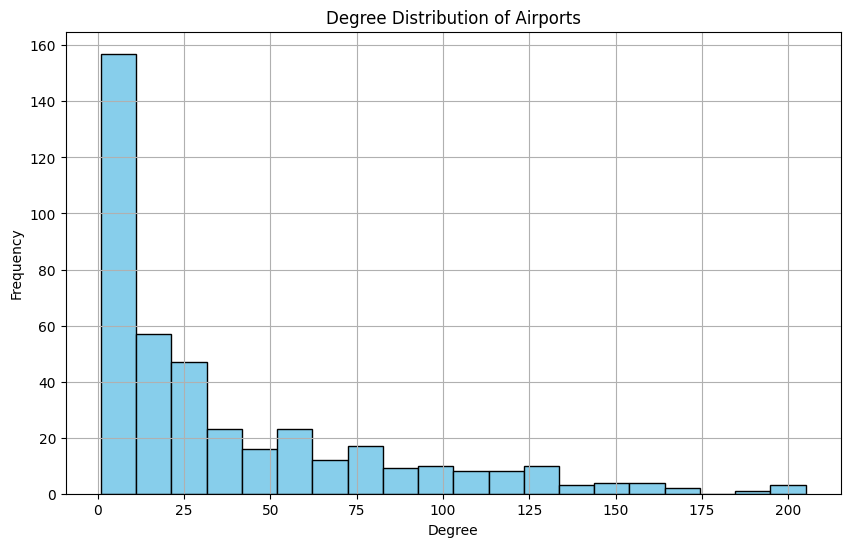

In [ ]:
# plot degree distribution
plt.figure(figsize=(10, 6))
plt.hist(airport_deg['Degree'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of Airports')
plt.grid(True)
plt.savefig("airport_degree_distribution.png")
plt.show()



Average clustering Coefficient

the average clustering coefficients let's us know how much  the network tend to create local clusters. With a average clustering coefficient at 0.543, we know that there's an above 54% chance that two neighbors are connected to a node.

The structure of the network suggests that airports with few flights (low degree) are likely to form clusters with nearby airports making them more closely connected

In [ ]:
nx.average_clustering(G)

0.5435923437985463

Centrality Measures

In [ ]:
# centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)
pagerank_centrality = nx.pagerank(G)


In [ ]:
print("Degree Centrality:", degree_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Closeness Centrality:", closeness_centrality)
print("Eigenvector Centrality:", eigenvector_centrality)
print("PageRank Centrality:", pagerank_centrality)

Degree Centrality: {'ABE': 0.16707021791767554, 'ABI': 0.09200968523002422, 'ABQ': 0.1864406779661017, 'ABR': 0.004842615012106538, 'ABY': 0.01694915254237288, 'ACK': 0.031476997578692496, 'ACT': 0.1162227602905569, 'ACV': 0.036319612590799036, 'ACY': 0.05569007263922519, 'ADK': 0.007263922518159807, 'ADQ': 0.02179176755447942, 'ADW': 0.002421307506053269, 'AEX': 0.07263922518159807, 'AFW': 0.026634382566585957, 'AGS': 0.12832929782082325, 'AHN': 0.014527845036319613, 'AKN': 0.02179176755447942, 'ALB': 0.15980629539951574, 'ALO': 0.014527845036319613, 'ALW': 0.012106537530266345, 'AMA': 0.13317191283292978, 'ANC': 0.10653753026634383, 'APC': 0.004842615012106538, 'APN': 0.007263922518159807, 'ASE': 0.05569007263922519, 'ATL': 0.4600484261501211, 'ATW': 0.11138014527845037, 'AUS': 0.3341404358353511, 'AVL': 0.12832929782082325, 'AVP': 0.06779661016949153, 'AZA': 0.1476997578692494, 'AZO': 0.01694915254237288, 'BAD': 0.004842615012106538, 'BAF': 0.004842615012106538, 'BDL': 0.18159806295

In [ ]:
threshold = 0.30

# get hubs based on the threshold
hubs = [node for node, centrality in degree_centrality.items() if centrality >= threshold]

print("Hubs with betweenness centrality above the threshold:")
print(hubs)

Hubs with betweenness centrality above the threshold:
['ATL', 'AUS', 'BNA', 'BWI', 'CLT', 'COS', 'DCA', 'DEN', 'DFW', 'DTW', 'EWR', 'IAH', 'IND', 'JFK', 'LAS', 'LAX', 'LGA', 'MIA', 'MKE', 'MSP', 'OKC', 'ORD', 'PHL', 'PHX', 'SEA', 'SFO', 'SLC']


In [ ]:
import pandas as pd

columns = ['ORIGIN', 'ORIGIN_CITY_NAME']

hub_data_frames = {}  # dict to store each hub

for hub in hubs:
    hub_data = routes_detail[routes_detail['ORIGIN'] == hub][columns].drop_duplicates()
    if not hub_data.empty:
        hub_data_frames[hub] = hub_data.iloc[0]  # first record for each hub


hub_summary_df = pd.DataFrame(hub_data_frames).T.reset_index(drop=True)
hub_summary_df.columns = columns

hub_summary_df

,ORIGIN,ORIGIN_CITY_NAME
0,ATL,"Atlanta, GA"
1,AUS,"Austin, TX"
2,BNA,"Nashville, TN"
3,BWI,"Baltimore, MD"
4,CLT,"Charlotte, NC"
5,COS,"Colorado Springs, CO"
6,DCA,"Washington, DC"
7,DEN,"Denver, CO"
8,DFW,"Dallas/Fort Worth, TX"
9,DTW,"Detroit, MI"


In [ ]:
hub_data = airports.loc[hubs, ['lat', 'long']]

hub_data


,lat,long
iata,,
ATL,33.636700,-84.428101
AUS,30.194500,-97.669899
BNA,36.124500,-86.678200
BWI,39.175400,-76.668297
CLT,35.214001,-80.943100
COS,38.805801,-104.700996
DCA,38.852100,-77.037697
DEN,39.861698,-104.672996
DFW,32.896801,-97.038002


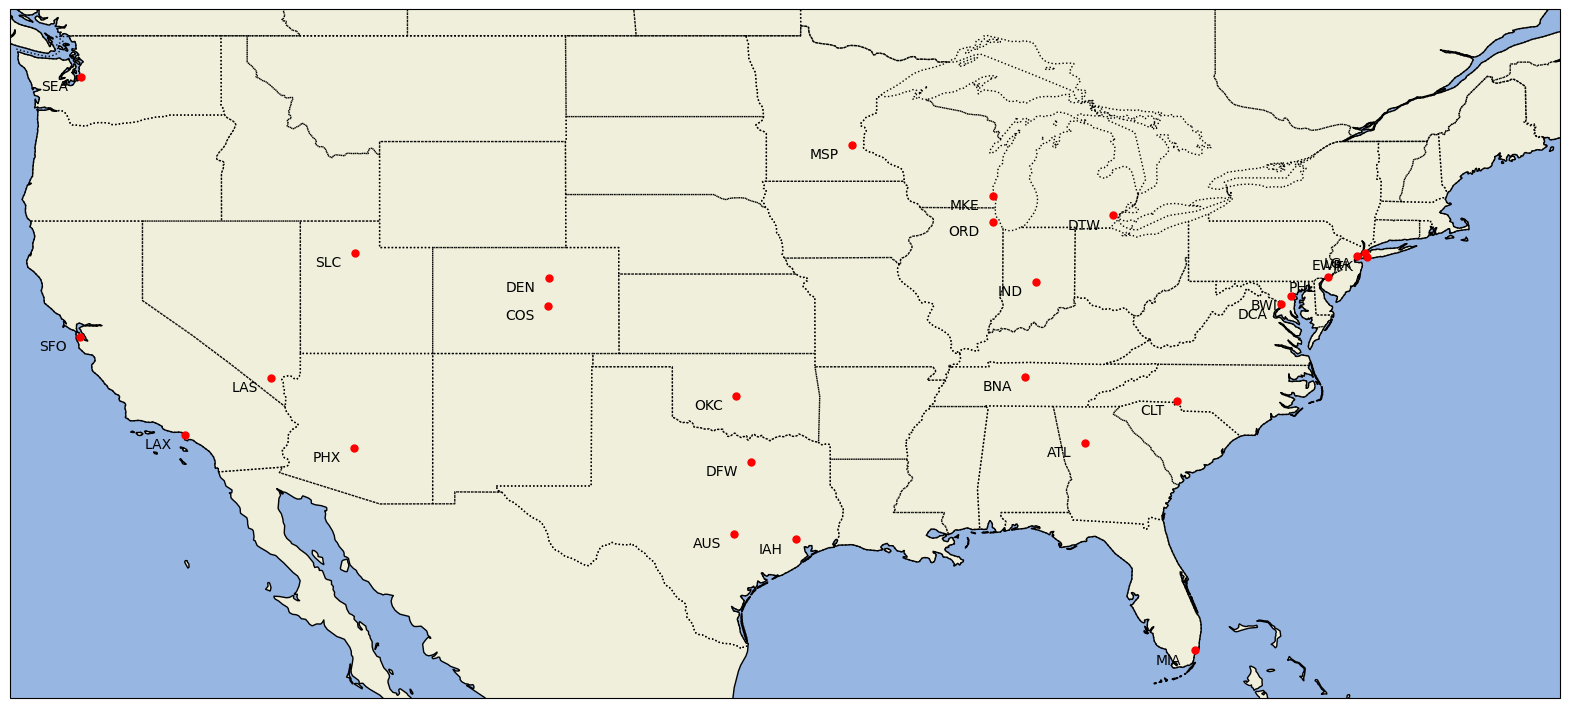

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings

warnings.filterwarnings("ignore")

fig, ax = plt.subplots(figsize=(20, 15), subplot_kw={'projection': ccrs.PlateCarree()})

# map features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':')

# set longitude/latitude
ax.set_extent([-125, -66.5, 24, 50], crs=ccrs.PlateCarree())

# plot each hub
for iata, row in hub_data.iterrows():
    ax.plot(row['long'], row['lat'], 'ro', markersize=5, transform=ccrs.Geodetic())
    ax.text(row['long'] - 0.5, row['lat']-0.5, iata, horizontalalignment='right', transform=ccrs.Geodetic())


# plt.savefig("hub_map.png")

plt.show()


##Map projection

In [ ]:
components = list(nx.connected_components(G))

# get largest connected component
largest_component_nodes = max(components, key=len)
sg = G.subgraph(largest_component_nodes)

In [ ]:
deg = nx.degree(sg)
sizes = [1.1 * deg[iata] for iata in sg.nodes]

labels = {iata: iata if deg[iata] >= 50 else ''
          for iata in sg.nodes}

Create dictionary of iata airport codes with their corresponding lat/long

In [ ]:
import math

pos = {iata: (row['long'], row['lat']) for iata, row in airports.iterrows()}
pos = {key: value for key, value in pos.items() if not isinstance(value, float) or not math.isnan(value)}
pos

{'BTI': (-143.5820007, 70.13400269),
 nan: (-76.38809967, 43.35079956),
 'LUR': (-166.1100006, 68.87509918),
 'PIZ': (-163.0050049, 69.73290253),
 'ITO': (-155.0480042, 19.72139931),
 'ORL': (-81.332901, 28.5455),
 'BTT': (-151.529007, 66.91390228),
 'UTO': (-153.7039948, 65.99279785),
 'FYU': (-145.25, 66.57150269),
 'SVW': (-155.5740051, 61.09740067),
 'FRN': (-149.6529999, 61.26639938),
 'TLJ': (-155.977005, 62.89440155),
 'CZF': (-166.0390015, 61.78030014),
 'BED': (-71.28900146, 42.47000122),
 'SNP': (-170.2200012, 57.16730118),
 'EHM': (-162.0630035, 58.64640045),
 'STG': (-169.6620026, 56.57830048),
 'ILI': (-154.9109955, 59.75439835),
 'PTU': (-161.8200073, 59.01139832),
 'BMX': (-155.2590027, 59.36119843),
 'OSC': (-83.394096, 44.451599),
 'OAR': (-121.762001, 36.68190002),
 'MHR': (-121.2979965, 38.55390167),
 'BYS': (-116.6299973, 35.2804985),
 'FSM': (-94.36740112, 35.33660126),
 'MRI': (-149.8439941, 61.21350098),
 'GNT': (-107.9020004, 35.16730118),
 'PNC': (-97.09980011,

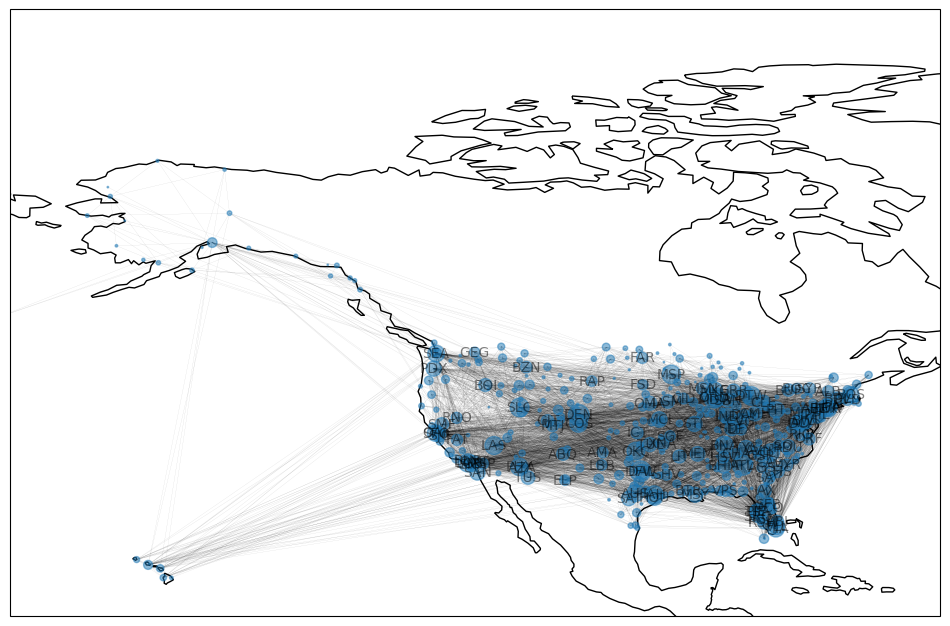

In [ ]:
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(
    1, 1, figsize=(12, 8),
    subplot_kw=dict(projection=crs))
ax.coastlines()

ax.set_extent([-175, -60, 15, 90])
nx.draw_networkx(sg, ax=ax,
                 font_size=10,
                 alpha=.5,
                 width=.05,
                 node_size=sizes,
                 labels=labels,
                 pos=pos,
                 cmap=plt.cm.autumn)

##Delay Data

In [ ]:
delay_may = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/INFO 606/Project/Data/T_ONTIME_REPORTING_may.csv')
delay_june = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/INFO 606/Project/Data/T_ONTIME_REPORTING_june.csv')
delay_july = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/INFO 606/Project/Data/T_ONTIME_REPORTING_july.csv')

delay_data = pd.concat([delay_may, delay_june, delay_july])



In [ ]:
delay_data.fillna(0, inplace=True)

delay_data

,YEAR,MONTH,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DEP_DELAY_NEW,DEP_DEL15,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2023,5,9E,ABE,"Allentown/Bethlehem/Easton, PA",ATL,"Atlanta, GA",0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023,5,9E,ABE,"Allentown/Bethlehem/Easton, PA",ATL,"Atlanta, GA",0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023,5,9E,ABE,"Allentown/Bethlehem/Easton, PA",ATL,"Atlanta, GA",0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,5,9E,ABE,"Allentown/Bethlehem/Easton, PA",ATL,"Atlanta, GA",0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023,5,9E,ABE,"Allentown/Bethlehem/Easton, PA",ATL,"Atlanta, GA",0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601861,2023,7,YX,XNA,"Fayetteville, AR",LGA,"New York, NY",86.0,1.0,0.0,0,0.0,0.0,0.0,37.0,0.0,25.0
601862,2023,7,YX,XNA,"Fayetteville, AR",LGA,"New York, NY",94.0,1.0,0.0,0,0.0,75.0,0.0,0.0,0.0,0.0
601863,2023,7,YX,XNA,"Fayetteville, AR",LGA,"New York, NY",113.0,1.0,0.0,0,0.0,0.0,0.0,100.0,0.0,0.0
601864,2023,7,YX,XNA,"Fayetteville, AR",LGA,"New York, NY",123.0,1.0,0.0,0,0.0,0.0,0.0,126.0,0.0,0.0


Delay data documentation

In [ ]:
documentation = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/INFO 606/Project/Data/documentation_delay_data.csv')
documentation

,SYS_FIELD_NAME,FIELD_DESC
0,YEAR,Year
1,MONTH,Month
2,OP_UNIQUE_CARRIER,Unique Carrier Code. When the same code has be...
3,ORIGIN,Origin Airport
4,ORIGIN_CITY_NAME,"Origin Airport, City Name"
5,DEST,Destination Airport
6,DEST_CITY_NAME,"Destination Airport, City Name"
7,DEP_DELAY_NEW,Difference in minutes between scheduled and ac...
8,DEP_DEL15,"Departure Delay Indicator, 15 Minutes or More ..."
9,CANCELLED,Cancelled Flight Indicator (1=Yes)


In [ ]:
# aggregation
aggregated_data = delay_data.groupby(['YEAR', 'MONTH', 'ORIGIN', 'DEST']).agg({
    'DEP_DELAY_NEW': ['mean', 'sum', 'count'],   # avg, total delay, and count of delays
    'DEP_DEL15': 'sum',                         # Total number of flights delayed by more than 15 minutes
    'CANCELLED': 'sum',                         # Total number of cancelled flights
    'DIVERTED': 'sum',                          # Total number of diverted flights
    'CARRIER_DELAY': 'mean',                    # avg carrier-specific delay
    'WEATHER_DELAY': 'mean',                    # avg weather-related delay
    'NAS_DELAY': 'mean',                        # avg National Airspace System delay
    'SECURITY_DELAY': 'mean',                   # avg security delay
    'LATE_AIRCRAFT_DELAY': 'mean'               # avg late aircraft delay
}).reset_index()

aggregated_data

YEAR MONTH ORIGIN DEST DEP_DELAY_NEW               DEP_DEL15 CANCELLED  \
                                       mean     sum count       sum       sum   
0      2023     5    ABE  ATL     25.715909  2263.0    88       7.0       0.0   
1      2023     5    ABE  BNA     27.625000   221.0     8       1.0       0.0   
2      2023     5    ABE  CLT      6.897727   607.0    88       7.0       0.0   
3      2023     5    ABE  FLL      1.750000    14.0     8       0.0       0.0   
4      2023     5    ABE  MYR      0.000000     0.0    11       0.0       0.0   
...     ...   ...    ...  ...           ...     ...   ...       ...       ...   
17274  2023     7    XWA  MSP      5.653846   294.0    52       1.0       0.0   
17275  2023     7    YAK  CDV      4.645161   144.0    31       3.0       1.0   
17276  2023     7    YAK  JNU      6.064516   188.0    31       3.0       0.0   
17277  2023     7    YUM  DFW     37.948276  2201.0    58      10.0       0.0   
17278  2023     7    YUM  PHX      8.068182   710.0    88       8.0       0.0   

      DIVERTED CARRIER_DELAY WEATHER_DELAY NAS_DELAY SECURITY_DELAY  \
           sum          mean          mean      mean           mean   
0          0.0     24.102273           0.0  0.000000            0.0   
1          0.0     18.125000           0.0  0.000000            0.0   
2          0.0      0.079545           0.0  0.000000            0.0   
3          0.0      1.375000           0.0  9.625000            0.0   
4          0.0      0.000000           0.0  0.000000            0.0   
...        ...           ...           ...       ...            ...   
17274      0.0      4.961538           0.0  0.000000            0.0   
17275      0.0      0.225806           0.0  0.032258            0.0   
17276      0.0      0.967742           0.0  1.064516            0.0   
17277      0.0      8.327586           0.0  0.000000            0.0   
17278      0.0      0.045455           0.0  1.147727            0.0   

      LATE_AIRCRAFT_DELAY  
                     mean  
0                0.000000  
1               22.375000  
2                4.625000  
3                0.000000  
4                0.000000  
...                   ...  
17274            0.000000  
17275            2.774194  
17276            2.709677  
17277           27.379310  
17278            6.125000  

[17279 rows x 15 columns]

In [ ]:
# hubs
hubs = ['ATL', 'AUS', 'BNA', 'BWI', 'CLT', 'COS', 'DCA', 'DEN', 'DFW', 'DTW', 'EWR',
        'IAH', 'IND', 'JFK', 'LAS', 'LAX', 'LGA', 'MIA', 'MKE', 'MSP', 'OKC', 'ORD',
        'PHL', 'PHX', 'SEA', 'SFO', 'SLC']



# adding HUB_ORIGIN and HUB_DEST columns
aggregated_data['HUB_ORIGIN'] = np.where(aggregated_data['ORIGIN'].isin(hubs), 1, 0)
aggregated_data['HUB_DEST'] = np.where(aggregated_data['DEST'].isin(hubs), 1, 0)

aggregated_data

YEAR MONTH ORIGIN DEST DEP_DELAY_NEW               DEP_DEL15 CANCELLED  \
                                       mean     sum count       sum       sum   
0      2023     5    ABE  ATL     25.715909  2263.0    88       7.0       0.0   
1      2023     5    ABE  BNA     27.625000   221.0     8       1.0       0.0   
2      2023     5    ABE  CLT      6.897727   607.0    88       7.0       0.0   
3      2023     5    ABE  FLL      1.750000    14.0     8       0.0       0.0   
4      2023     5    ABE  MYR      0.000000     0.0    11       0.0       0.0   
...     ...   ...    ...  ...           ...     ...   ...       ...       ...   
17274  2023     7    XWA  MSP      5.653846   294.0    52       1.0       0.0   
17275  2023     7    YAK  CDV      4.645161   144.0    31       3.0       1.0   
17276  2023     7    YAK  JNU      6.064516   188.0    31       3.0       0.0   
17277  2023     7    YUM  DFW     37.948276  2201.0    58      10.0       0.0   
17278  2023     7    YUM  PHX      8.068182   710.0    88       8.0       0.0   

      DIVERTED CARRIER_DELAY WEATHER_DELAY NAS_DELAY SECURITY_DELAY  \
           sum          mean          mean      mean           mean   
0          0.0     24.102273           0.0  0.000000            0.0   
1          0.0     18.125000           0.0  0.000000            0.0   
2          0.0      0.079545           0.0  0.000000            0.0   
3          0.0      1.375000           0.0  9.625000            0.0   
4          0.0      0.000000           0.0  0.000000            0.0   
...        ...           ...           ...       ...            ...   
17274      0.0      4.961538           0.0  0.000000            0.0   
17275      0.0      0.225806           0.0  0.032258            0.0   
17276      0.0      0.967742           0.0  1.064516            0.0   
17277      0.0      8.327586           0.0  0.000000            0.0   
17278      0.0      0.045455           0.0  1.147727            0.0   

      LATE_AIRCRAFT_DELAY HUB_ORIGIN HUB_DEST  
                     mean                      
0                0.000000          0        1  
1               22.375000          0        1  
2                4.625000          0        1  
3                0.000000          0        0  
4                0.000000          0        0  
...                   ...        ...      ...  
17274            0.000000          0        1  
17275            2.774194          0        0  
17276            2.709677          0        0  
17277           27.379310          0        1  
17278            6.125000          0        1  

[17279 rows x 17 columns]

identify flights from hub airports and then calculate the basic delay metrics for each hub

In [ ]:
# filter flights originating from hubs
hub_origin_flights = delay_data[delay_data['ORIGIN'].isin(hubs)]

# calc delay metrics for each hub airport
hub_delays = hub_origin_flights.groupby('ORIGIN').agg({
    'DEP_DELAY_NEW': ['mean', 'max', 'count', lambda x: (x > 15).sum()],
    'CANCELLED': ['mean', 'sum'],
}).rename(columns={'<lambda>': 'delay_15min_count'})

hub_delays.columns = ['_'.join(col).strip() for col in hub_delays.columns.values]

hub_delays.reset_index(inplace=True)

hub_delays


,ORIGIN,DEP_DELAY_NEW_mean,DEP_DELAY_NEW_max,DEP_DELAY_NEW_count,DEP_DELAY_NEW_<lambda_0>,CANCELLED_mean,CANCELLED_sum
0,ATL,17.908259,3221.0,87344,22844,0.010109,883.0
1,AUS,18.321501,2165.0,23664,5583,0.010480,248.0
2,BNA,18.801026,2033.0,24556,6125,0.015149,372.0
3,BWI,22.505182,1467.0,24797,8458,0.012622,313.0
4,CLT,22.801953,1717.0,49771,12988,0.013783,686.0
5,COS,18.990515,1297.0,2952,647,0.015583,46.0
6,DCA,18.323539,1536.0,35223,7048,0.024586,866.0
7,DEN,25.253486,1595.0,73866,24885,0.022636,1672.0
8,DFW,23.577003,1689.0,74906,21052,0.011241,842.0
9,DTW,15.199329,1563.0,32203,6209,0.012608,406.0


identify the airports connected to each hub by direct flights

In [ ]:
# initialize list to hold data for each hub's connected airports
connected_airports_list = []

# find unique destinations
for hub in hubs:
    # unique destinations for current hub
    destinations = delay_data[delay_data['ORIGIN'] == hub]['DEST'].unique()
    # create list of dicts with hub & connected airport data
    connected_airports_list.extend([{'HUB': hub, 'CONNECTED_AIRPORT': dest} for dest in destinations])

connected_airports = pd.DataFrame(connected_airports_list)

connected_airports


,HUB,CONNECTED_AIRPORT
0,ATL,ABE
1,ATL,ABY
2,ATL,AEX
3,ATL,AGS
4,ATL,BQK
...,...,...
2434,SLC,HOU
2435,SLC,MDW
2436,SLC,ANC
2437,SLC,LGA


Start by calculating the delay metrics for connected airports. For each connected airport group the data by the destination airport and perform the
aggregation.

Filter the flights that originate from that hub, group by destination airport, and then calculate mean delay, delay standard deviation, count of flights, count of flights delayed more than 15 minutes, mean cancellation rate, and total number of cancellations

In [ ]:
# initialize empty df to store delay metrics for connected airports
connected_airports_delays = pd.DataFrame()

# loop each hub airport
for hub in hubs:
    # filter for flights originating from current hub
    hub_flights = delay_data[delay_data['ORIGIN'] == hub]
    # groupby dest airport and calculate delay metrics
    hub_to_dest_delays = hub_flights.groupby('DEST').agg({
        'DEP_DELAY_NEW': ['mean', 'std', 'count', lambda x: (x > 15).sum()],
        'CANCELLED': ['mean', 'sum'],
    }).rename(columns={'<lambda>': 'delay_15min_count'})

    hub_to_dest_delays.columns = ['_'.join(col).strip() for col in hub_to_dest_delays.columns.values]

    # add column for current hub
    hub_to_dest_delays['HUB'] = hub

    # append results - connected_airports_delays df
    connected_airports_delays = pd.concat([connected_airports_delays, hub_to_dest_delays.reset_index()], ignore_index=True)


connected_airports_delays


,DEST,DEP_DELAY_NEW_mean,DEP_DELAY_NEW_std,DEP_DELAY_NEW_count,DEP_DELAY_NEW_<lambda_0>,CANCELLED_mean,CANCELLED_sum,HUB
0,ABE,6.253846,21.896144,260,33,0.003846,1.0,ATL
1,ABQ,11.341176,51.804574,255,41,0.003922,1.0,ATL
2,ABY,7.402174,23.564844,184,25,0.005435,1.0,ATL
3,AEX,9.875676,30.739627,185,24,0.005405,1.0,ATL
4,AGS,11.309478,36.614599,517,79,0.001934,1.0,ATL
...,...,...,...,...,...,...,...,...
2434,TPA,10.293478,25.860377,92,15,0.032609,3.0,SLC
2435,TUL,3.320442,9.945243,181,13,0.000000,0.0,SLC
2436,TUS,5.454545,21.647827,275,22,0.000000,0.0,SLC
2437,TWF,2.913043,14.456948,92,4,0.000000,0.0,SLC


Determine the average delay and other statistics for flights leaving each hub.

In [ ]:
# calc delay metrics for each hub airport
hub_delay_metrics = delay_data[delay_data['ORIGIN'].isin(hubs)].groupby('ORIGIN').agg({
    'DEP_DELAY_NEW': ['mean', 'std', 'count', lambda x: (x > 15).sum()],
    'CANCELLED': ['mean', 'sum'],
}).rename(columns={'<lambda>': 'delay_15min_count'})

hub_delay_metrics.columns = ['_'.join(col).strip() for col in hub_delay_metrics.columns.values]


Combine the hub metrics with the connected airport metrics for comparison

In [ ]:
# merge hub delay metrics with connected airport delays

merged_delays = pd.merge(connected_airports_delays, hub_delay_metrics, left_on='HUB', right_index=True, suffixes=('_connected', '_hub'))
merged_delays

,DEST,DEP_DELAY_NEW_mean_connected,DEP_DELAY_NEW_std_connected,DEP_DELAY_NEW_count_connected,DEP_DELAY_NEW_<lambda_0>_connected,CANCELLED_mean_connected,CANCELLED_sum_connected,HUB,DEP_DELAY_NEW_mean_hub,DEP_DELAY_NEW_std_hub,DEP_DELAY_NEW_count_hub,DEP_DELAY_NEW_<lambda_0>_hub,CANCELLED_mean_hub,CANCELLED_sum_hub
0,ABE,6.253846,21.896144,260,33,0.003846,1.0,ATL,17.908259,48.343216,87344,22844,0.010109,883.0
1,ABQ,11.341176,51.804574,255,41,0.003922,1.0,ATL,17.908259,48.343216,87344,22844,0.010109,883.0
2,ABY,7.402174,23.564844,184,25,0.005435,1.0,ATL,17.908259,48.343216,87344,22844,0.010109,883.0
3,AEX,9.875676,30.739627,185,24,0.005405,1.0,ATL,17.908259,48.343216,87344,22844,0.010109,883.0
4,AGS,11.309478,36.614599,517,79,0.001934,1.0,ATL,17.908259,48.343216,87344,22844,0.010109,883.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,TPA,10.293478,25.860377,92,15,0.032609,3.0,SLC,13.243467,50.284208,27782,4788,0.008315,231.0
2435,TUL,3.320442,9.945243,181,13,0.000000,0.0,SLC,13.243467,50.284208,27782,4788,0.008315,231.0
2436,TUS,5.454545,21.647827,275,22,0.000000,0.0,SLC,13.243467,50.284208,27782,4788,0.008315,231.0
2437,TWF,2.913043,14.456948,92,4,0.000000,0.0,SLC,13.243467,50.284208,27782,4788,0.008315,231.0


Look for correlations between delays at the hubs and delays at connected airports.

note- correlation does not imply causation -  a high correlation between delays at hubs and connected airports does not necessarily mean that one causes the other

In [ ]:
# remove non-numeric columns before calculating corr()
numeric_columns = merged_delays.select_dtypes(include=[np.number])

# calculate correlation matrix for delay metrics
correlation_metrics = numeric_columns.corr()
correlation_metrics

,DEP_DELAY_NEW_mean_connected,DEP_DELAY_NEW_std_connected,DEP_DELAY_NEW_count_connected,DEP_DELAY_NEW_<lambda_0>_connected,CANCELLED_mean_connected,CANCELLED_sum_connected,DEP_DELAY_NEW_mean_hub,DEP_DELAY_NEW_std_hub,DEP_DELAY_NEW_count_hub,DEP_DELAY_NEW_<lambda_0>_hub,CANCELLED_mean_hub,CANCELLED_sum_hub
DEP_DELAY_NEW_mean_connected,1.000000,0.830135,0.129132,0.269453,0.129018,0.174491,0.386022,0.306887,0.046078,0.139637,0.174051,0.181398
DEP_DELAY_NEW_std_connected,0.830135,1.000000,0.160110,0.218599,0.171783,0.182510,0.264325,0.291960,-0.001109,0.050045,0.124005,0.101583
DEP_DELAY_NEW_count_connected,0.129132,0.160110,1.000000,0.940307,0.042939,0.648014,0.007418,-0.049625,0.147501,0.124822,0.026096,0.098244
DEP_DELAY_NEW_<lambda_0>_connected,0.269453,0.218599,0.940307,1.000000,0.049804,0.626432,0.144262,0.024164,0.191304,0.212932,0.052128,0.151085
CANCELLED_mean_connected,0.129018,0.171783,0.042939,0.049804,1.000000,0.390677,0.213459,0.139005,-0.058680,-0.021943,0.472198,0.383827
CANCELLED_sum_connected,0.174491,0.182510,0.648014,0.626432,0.390677,1.000000,0.189233,0.097505,0.007588,0.029371,0.476070,0.426344
DEP_DELAY_NEW_mean_hub,0.386022,0.264325,0.007418,0.144262,0.213459,0.189233,1.000000,0.777686,0.218469,0.439553,0.440132,0.508763
DEP_DELAY_NEW_std_hub,0.306887,0.291960,-0.049625,0.024164,0.139005,0.097505,0.777686,1.000000,-0.094009,0.047821,0.295894,0.170030
DEP_DELAY_NEW_count_hub,0.046078,-0.001109,0.147501,0.191304,-0.058680,0.007588,0.218469,-0.094009,1.000000,0.950926,-0.135840,0.437592
DEP_DELAY_NEW_<lambda_0>_hub,0.139637,0.050045,0.124822,0.212932,-0.021943,0.029371,0.439553,0.047821,0.950926,1.000000,-0.057410,0.496995


filtering the correlation matrix to show only the correlations between the hub delay metrics (designated with _hub in the column names) and the connected airport delay metrics (designated with _connected)

In [ ]:
# correlations between hub delays and connected airport delays
hub_to_connected_correlation = correlation_metrics.filter(like='_hub').filter(like='_connected', axis=0)

hub_to_connected_correlation

,DEP_DELAY_NEW_mean_hub,DEP_DELAY_NEW_std_hub,DEP_DELAY_NEW_count_hub,DEP_DELAY_NEW_<lambda_0>_hub,CANCELLED_mean_hub,CANCELLED_sum_hub
DEP_DELAY_NEW_mean_connected,0.386022,0.306887,0.046078,0.139637,0.174051,0.181398
DEP_DELAY_NEW_std_connected,0.264325,0.291960,-0.001109,0.050045,0.124005,0.101583
DEP_DELAY_NEW_count_connected,0.007418,-0.049625,0.147501,0.124822,0.026096,0.098244
DEP_DELAY_NEW_<lambda_0>_connected,0.144262,0.024164,0.191304,0.212932,0.052128,0.151085
CANCELLED_mean_connected,0.213459,0.139005,-0.058680,-0.021943,0.472198,0.383827
CANCELLED_sum_connected,0.189233,0.097505,0.007588,0.029371,0.476070,0.426344


####1) verify whether the observed correlations are statistically significant, by performing hypothesis testing for each correlation coefficient. Will be testing the null hypothesis that the correlation coefficient is zero (no correlation).

In [ ]:
from scipy.stats import pearsonr

# testing the correlation between DEP_DELAY_NEW_mean at hubs and connected airports
corr_coefficient, p_value = pearsonr(merged_delays['DEP_DELAY_NEW_mean_hub'], merged_delays['DEP_DELAY_NEW_mean_connected'])
print(f"Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")


Correlation Coefficient: 0.3860217026359911
P-value: 1.7064060391619675e-87


with such a small p-value - we can reject the null hypothesis and conclude that the correlation is statistically significant.

#2) Investigating Causative Factors




In [ ]:
import statsmodels.api as sm

# linear regression with DEP_DELAY_NEW_mean_hub predicting DEP_DELAY_NEW_mean_connected
X = sm.add_constant(merged_delays['DEP_DELAY_NEW_mean_hub'])
model = sm.OLS(merged_delays['DEP_DELAY_NEW_mean_connected'], X).fit()
print(model.summary())


                                 OLS Regression Results                                 
Dep. Variable:     DEP_DELAY_NEW_mean_connected   R-squared:                       0.149
Model:                                      OLS   Adj. R-squared:                  0.149
Method:                           Least Squares   F-statistic:                     426.7
Date:                          Fri, 03 May 2024   Prob (F-statistic):           1.71e-87
Time:                                  00:21:10   Log-Likelihood:                -9104.4
No. Observations:                          2439   AIC:                         1.821e+04
Df Residuals:                              2437   BIC:                         1.822e+04
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------

#3) Predictive Modeling





In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# prep data
X = merged_delays[['DEP_DELAY_NEW_mean_hub']]  # predictor
y = merged_delays['DEP_DELAY_NEW_mean_connected']  # target

# training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


regr = LinearRegression()

# train model
regr.fit(X_train, y_train)

# predictions using testing set
y_pred = regr.predict(X_test)

# coefficients
print('Coefficients:', regr.coef_)
# mean squared error
print('Mean squared error:', mean_squared_error(y_test, y_pred))
# coefficient of determination -  1 = perfect prediction
print('Coefficient of determination:', r2_score(y_test, y_pred))


Coefficients: [0.95057034]
Mean squared error: 83.60037244838598
Coefficient of determination: 0.184505901579596


###Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = merged_delays[['DEP_DELAY_NEW_mean_hub', 'CANCELLED_mean_hub']]  # predictor variables
y = merged_delays['DEP_DELAY_NEW_mean_connected']  # target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


RF model training

In [ ]:
# Create random forest regressor object
rf = RandomForestRegressor(n_estimators=100, max_features='auto', random_state=42)

# training
rf.fit(X_train, y_train)


RandomForestRegressor(max_features='auto', random_state=42)

Evaluate RF model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# predictions using the testing set
y_pred = rf.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Coefficient of Determination (R^2):', r2_score(y_test, y_pred))


Mean Squared Error: 85.14760292809316
Coefficient of Determination (R^2): 0.1790511610436596


Hyperparameter tuning Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30]
}

# gridsearchCV set parameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# fit grid search to data
grid_search.fit(X_train, y_train)

# best parameters and score
print('Best parameters:', grid_search.best_params_)
print('Best score:', -grid_search.best_score_)


Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50}
Best score: 110.15330669812722


###Feature importance

In [ ]:
# get feature importance
importances = rf.feature_importances_


for i, j in zip(X.columns, importances):
    print(f'Feature: {i}, Importance: {j}')


Feature: DEP_DELAY_NEW_mean_hub, Importance: 0.939450661230726
Feature: CANCELLED_mean_hub, Importance: 0.06054933876927403


#Centrality Measures

In [ ]:
G = nx.Graph()

# nodes - airports
for airport in delay_data['ORIGIN'].unique():
    G.add_node(airport)

# weight based on the number of flights between each pair
edge_weights = delay_data.groupby(['ORIGIN', 'DEST']).size().reset_index(name='weight')

# add edges with weights
for _, row in edge_weights.iterrows():
    G.add_edge(row['ORIGIN'], row['DEST'], weight=row['weight'])

1) Betweenness Centrality

Betweenness centrality is a crucial measure for robustness analysis.It quantifies the number of times a node acts as a bridge along the shortest path between two other nodes.

Nodes with **high** betweenness centrality are significant for the flow of flights, in the case of an airline network and are potential points of failure that could disrupt the network.

In [ ]:
betweenness = nx.betweenness_centrality(G)

# find most critical nodes based on betweenness centrality
critical_nodes = sorted(betweenness, key=betweenness.get, reverse=True)[:10]  # top 10 nodes


for node in critical_nodes:
    print(f"Node {node}: Betweenness Centrality = {betweenness[node]}")


Node DFW: Betweenness Centrality = 0.1973692226623666
Node DEN: Betweenness Centrality = 0.16548120784906553
Node ORD: Betweenness Centrality = 0.11581273490938238
Node ATL: Betweenness Centrality = 0.09104993919743053
Node MSP: Betweenness Centrality = 0.08050103529726618
Node ANC: Betweenness Centrality = 0.06516708895579744
Node LAS: Betweenness Centrality = 0.05177925306237973
Node SEA: Betweenness Centrality = 0.0493856107730141
Node SLC: Betweenness Centrality = 0.045574530597279
Node CLT: Betweenness Centrality = 0.04401494530900115


Visualize betweenness centrality

In [ ]:
# pos = nx.kamada_kawai_layout(G)  # positions for nodes

pos = nx.circular_layout(G)

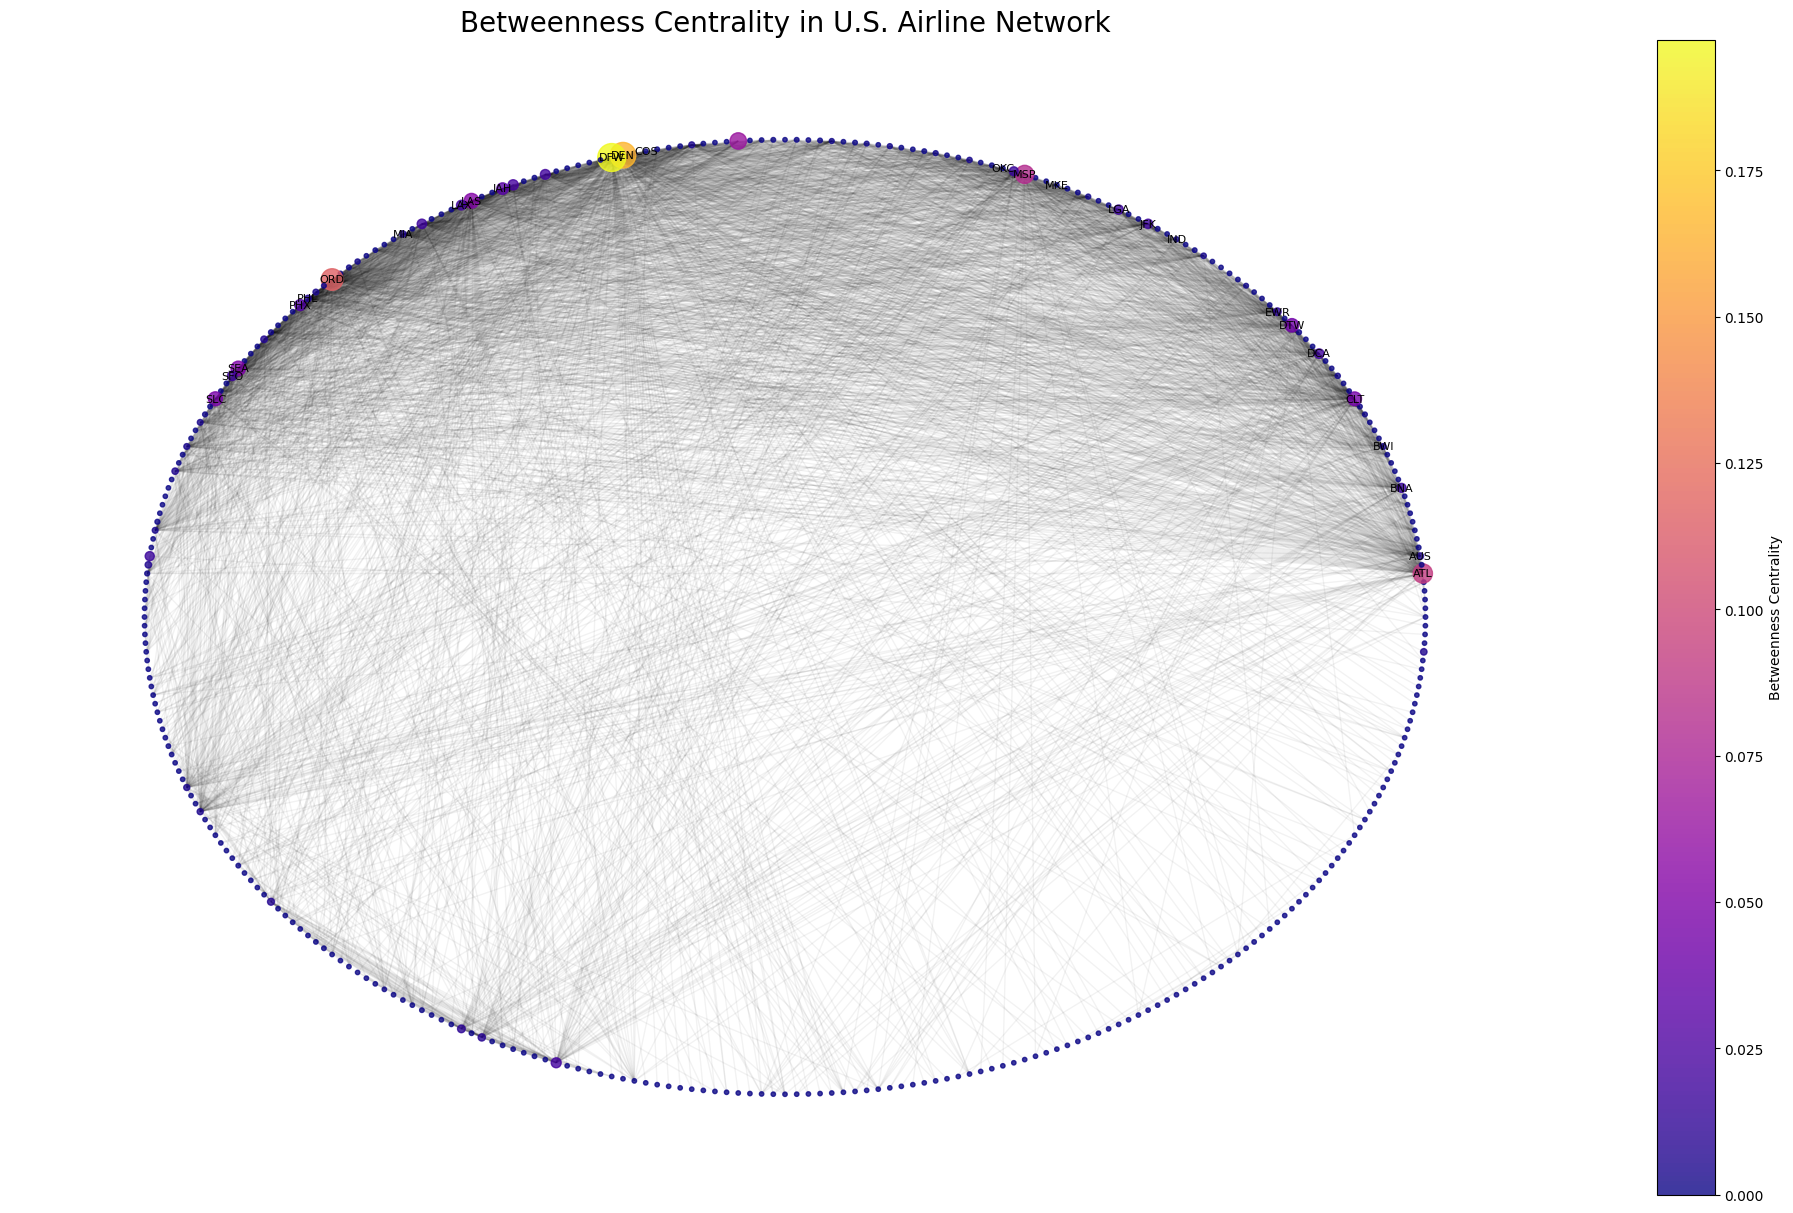

In [ ]:

plt.figure(figsize=(25, 15))
plt.title('Betweenness Centrality in U.S. Airline Network', size=20)

node_sizes = [2000 * v + 10 for v in betweenness.values()]
node_colors = [betweenness[v] for v in G]
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.plasma, alpha=0.8)

# edges
edges = nx.draw_networkx_edges(G, pos, alpha=0.05)

# node labels for hubs
labels = {node: node if node in hubs else '' for node in G.nodes()}

nx.draw_networkx_labels(G, pos, labels=labels, font_size=8)


plt.colorbar(nodes, label='Betweenness Centrality')


plt.axis('off')
plt.show()

2) Closeness Centrality

Will measure how close a node is to all other nodes in the network, which can help identify how quickly disruptions can spread from one node to others. Node(s) with **high** closeness centrality could affect many other nodes due to shorter paths.

In [ ]:
closeness = nx.closeness_centrality(G)

# find most critical nodes based on closeness centrality
critical_nodes = sorted(closeness, key=closeness.get, reverse=True)[:10]  # top 10 nodes


for node in critical_nodes:
    print(f"Node {node}: Closeness Centrality = {closeness[node]}")

Node DFW: Closeness Centrality = 0.669921875
Node DEN: Closeness Centrality = 0.6459510357815442
Node ORD: Closeness Centrality = 0.6363636363636364
Node ATL: Closeness Centrality = 0.6259124087591241
Node LAS: Closeness Centrality = 0.6007005253940455
Node MSP: Closeness Centrality = 0.5954861111111112
Node CLT: Closeness Centrality = 0.5883361921097771
Node PHX: Closeness Centrality = 0.5707154742096506
Node LAX: Closeness Centrality = 0.5697674418604651
Node IAH: Closeness Centrality = 0.5641447368421053


Visualize closeness centrality

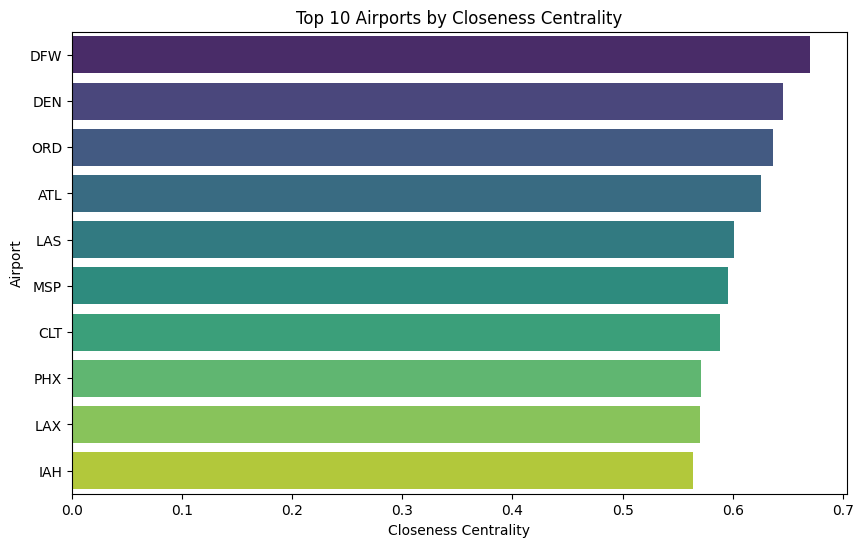

In [ ]:
import seaborn as sns

# create df from centrality data
closeness_data = pd.DataFrame(list(closeness.items()), columns=['Airport', 'ClosenessCentrality'])
top_closeness = closeness_data.nlargest(10, 'ClosenessCentrality')

# plot
plt.figure(figsize=(10, 6))
sns.barplot(x='ClosenessCentrality', y='Airport', data=top_closeness, palette='viridis')
plt.title('Top 10 Airports by Closeness Centrality')
plt.xlabel('Closeness Centrality')
plt.ylabel('Airport')
plt.show()


3) Adamic-Adar Index

Compute the Adamic-Adar Index for all pairs of nodes that are not directly connected but share common neighbors.

This will help identify potentially significant routes based on shared connections between airports and provide insight into network robustness, connectivity or potential areas for route development.

A higher score suggests a stronger potential link based on shared connections that are themselves less connected.

Sort scores to identify the most significant potential connections

In [ ]:
#  adamic-adar index for non-connected node pairs
adamic_adar_index = list(nx.adamic_adar_index(G))

# sort results by index score in desc order to see MOST potential connections
sorted_adamic_adar = sorted(adamic_adar_index, key=lambda x: x[2], reverse=True)


for u, v, p in sorted_adamic_adar[:10]:  # print top 10 results
    print(f"Potential strong connection between {u} and {v} with index {p:.2f}")


Potential strong connection between PIE and SFB with index 25.03
Potential strong connection between MDW and ORD with index 19.18
Potential strong connection between DAL and DFW with index 19.17
Potential strong connection between PHL and LGA with index 17.82
Potential strong connection between DFW and SFB with index 16.83
Potential strong connection between EWR and LGA with index 16.80
Potential strong connection between BWI and DCA with index 16.62
Potential strong connection between ATL and SFB with index 16.51
Potential strong connection between PGD and PIE with index 16.24
Potential strong connection between LAS and AZA with index 16.13


In [ ]:
connections_df = pd.DataFrame(sorted_adamic_adar[:10], columns=['Airport1', 'Airport2', 'AdamicAdarIndex'])
connections_df

,Airport1,Airport2,AdamicAdarIndex
0,PIE,SFB,25.027562
1,MDW,ORD,19.175286
2,DAL,DFW,19.165866
3,PHL,LGA,17.817865
4,DFW,SFB,16.832856
5,EWR,LGA,16.803597
6,BWI,DCA,16.615554
7,ATL,SFB,16.514916
8,PGD,PIE,16.236044
9,LAS,AZA,16.129118
